In [1]:
pip install pillow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import Image

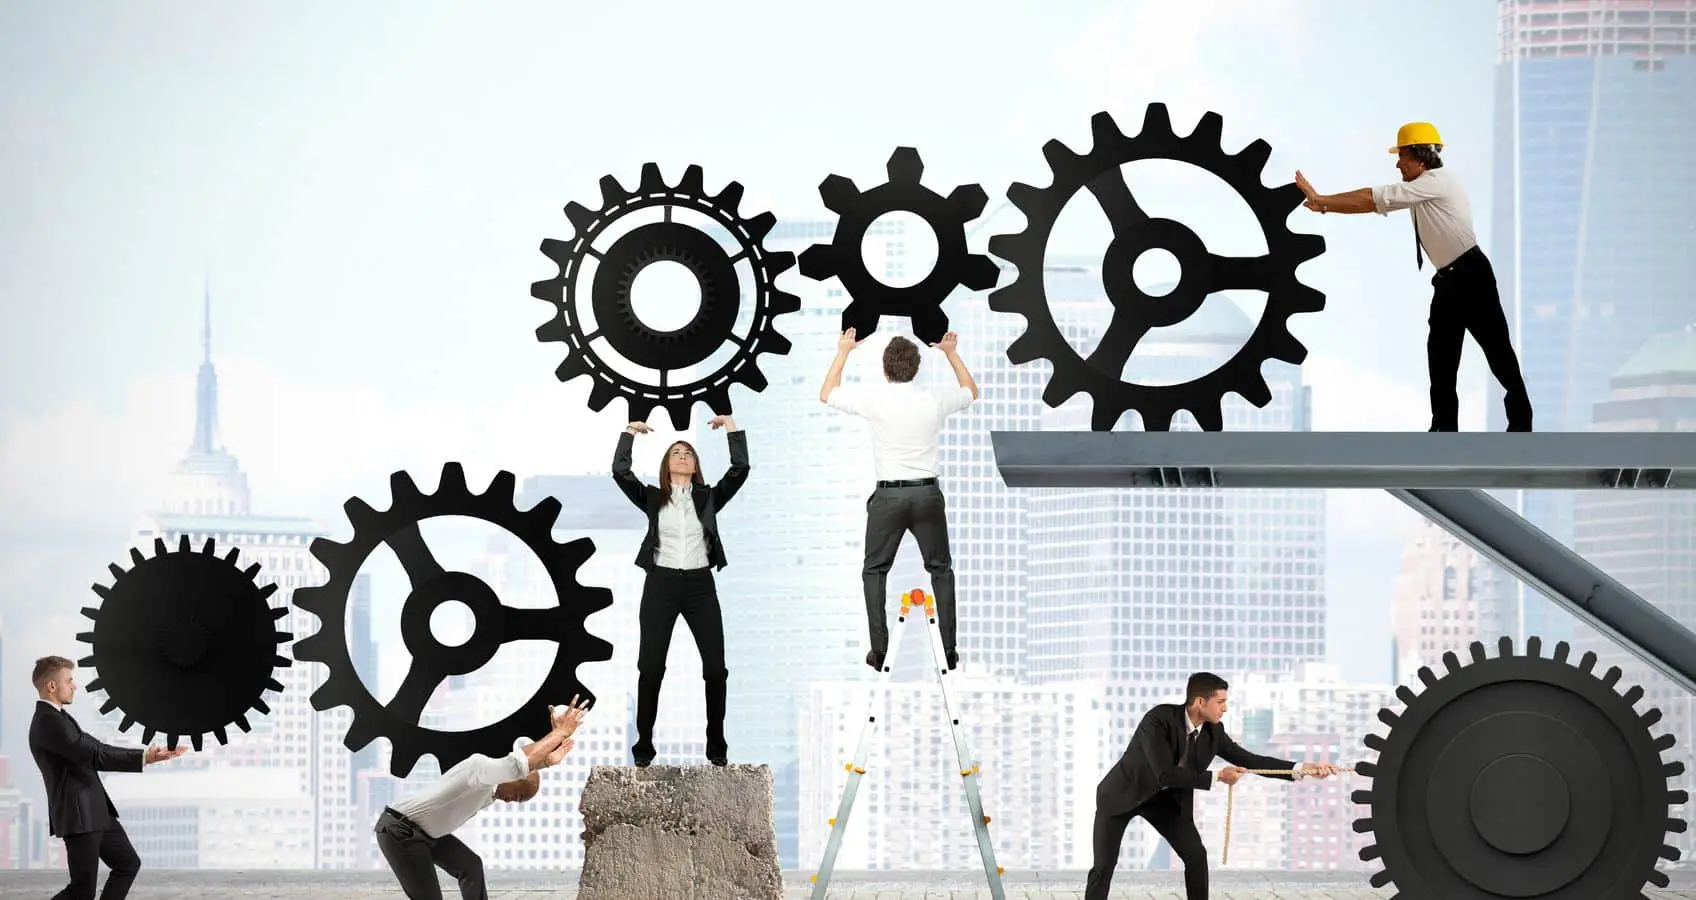

In [15]:
Image ("Images/the-employee-performance-continuum.jpg" , width=1000, height=600)

# Employee Performance Analysis

**Author: Sneha Bhaskar**

**Date**: 10 October 2023 

___________________________________________________

# Overview 

# Business & Goal of this project

In today's competitive business landscape, employee performance plays a pivotal role in a company's success. Organizations need to understand the factors influencing employee performance to optimize workforce strategies, foster employee growth, and maintain a competitive edge. For the company in question, having a comprehensive and data-driven understanding of the performance determinants can enable effective HR decisions, from recruitment strategies to tailored training programs.

**Project Goal:**
- The primary objective of this project is to derive actionable insights from the Employee dataset to understand the critical factors affecting employee performance ratings. By leveraging data analytic skills, the company aims to predict performance ratings with high accuracy and pinpoint the most influential features. The insights obtained will serve as a foundation for data-driven decision-making in HR strategies, leading to improved employee performance and, by extension, organizational growth.

The data was taken from https://www.analyticsvidhya.com/blog/2023/05/10-best-data-analytics-projects/#h-employee-performance-analysis


#### Import standard packages

In [3]:
import pandas as pd #data manipulation and analysis. Can create data frames, filter data, group by attributes, etc. 
import numpy as np #numerical python library for array manipulation, math functions etc.
import seaborn as sns #data visualization library based on Matplotlib, with higher-level functions ad nicer default styles. 

import matplotlib.pyplot as plt #2D plotting lib.
plt.style.use("ggplot") #changes the default style of Matplotlib plots to ggplot.

from statsmodels.formula.api import ols #ordinary least square (OLS) is a regression model aiming to minimise the sum of squared differences between observed and predicted values.
import statsmodels.api as sm #statsmodel includes various statistical tests, models and functions. 
from statsmodels.stats.outliers_influence import variance_inflation_factor #a measure to detect multicollinearity in regression moedels.
import scipy.stats as stats #statistical functions from the SciPy lib, which builds on NumPy. This lib also provides a large number of probability distribution, statistical functions and test for statistical analysis. 
from sklearn.linear_model import LinearRegression  #linear model
from sklearn.model_selection import train_test_split #function for splitting datasets into training and testing sets. 
from sklearn.metrics import mean_squared_error #function for computing the mean squarred error, a meausure of the average of the sqaures of the errors.
from sklearn.preprocessing import OneHotEncoder #preprocessing technique to convert categorical variables to a format that can be provided to machine learning algorithms to improve prediction 
from sklearn.model_selection import cross_val_score #function for evaluating a model using cross-validation 
from sklearn.model_selection import KFold #K-Fold cross validator
from itertools import combinations #itertools is used for generating all possible combination of the given list.

## Employee Performance Dataset

LOAD DATA FOR EXPLOTARY DATA ANALYSIS

In [8]:
df = pd.read_csv ('Data/Employee_Performance_Data.csv')
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

BASIC CHECKS OF DATA

In [7]:
#check for duplicates
df.duplicated(keep = False).sum()

0

In [10]:
#checking columns
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

### Differentiate into Categorical, Numerical and Ordinal - More information can be found in Metadata Prodivided in Data Folder 
**Categorical Features**
- EmpNumber
- Gender
- EducationBackground
- MaritalStatus
- EmpDepartment
- EmpJobRole
- BusinessTravelFrequency
- OverTime
- Attrition

**Numerical Features**
- Age
- DistanceFromHome
- EmpHourlyRate
- NumCompaniesWorked
- EmpLastSalaryHikePercent
- TotalWorkExperienceInYears
- TrainingTimesLastYear
- ExperienceYearsAtThisCompany
- ExperienceYearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

**Ordinal Features**
- EmpEducationLevel
- EmpEnvironmentSatisfaction
- EmpJobInvolvement
- EmpJobLevel
- EmpJobSatisfaction
- EmpRelationshipSatisfaction
- EmpWorkLifeBalance
- PerformanceRating

In [14]:
df.shape

(1200, 28)

Dataset contain total 28 features with 1 unique feature (EmpNumber) and 1200 observation.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

STATISTICAL MEASURE OF DATA

In [19]:
df.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [26]:
#Categorical 
df.describe(include="O")

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

## DEPARTMENT WISE PERFORMANCE RATING

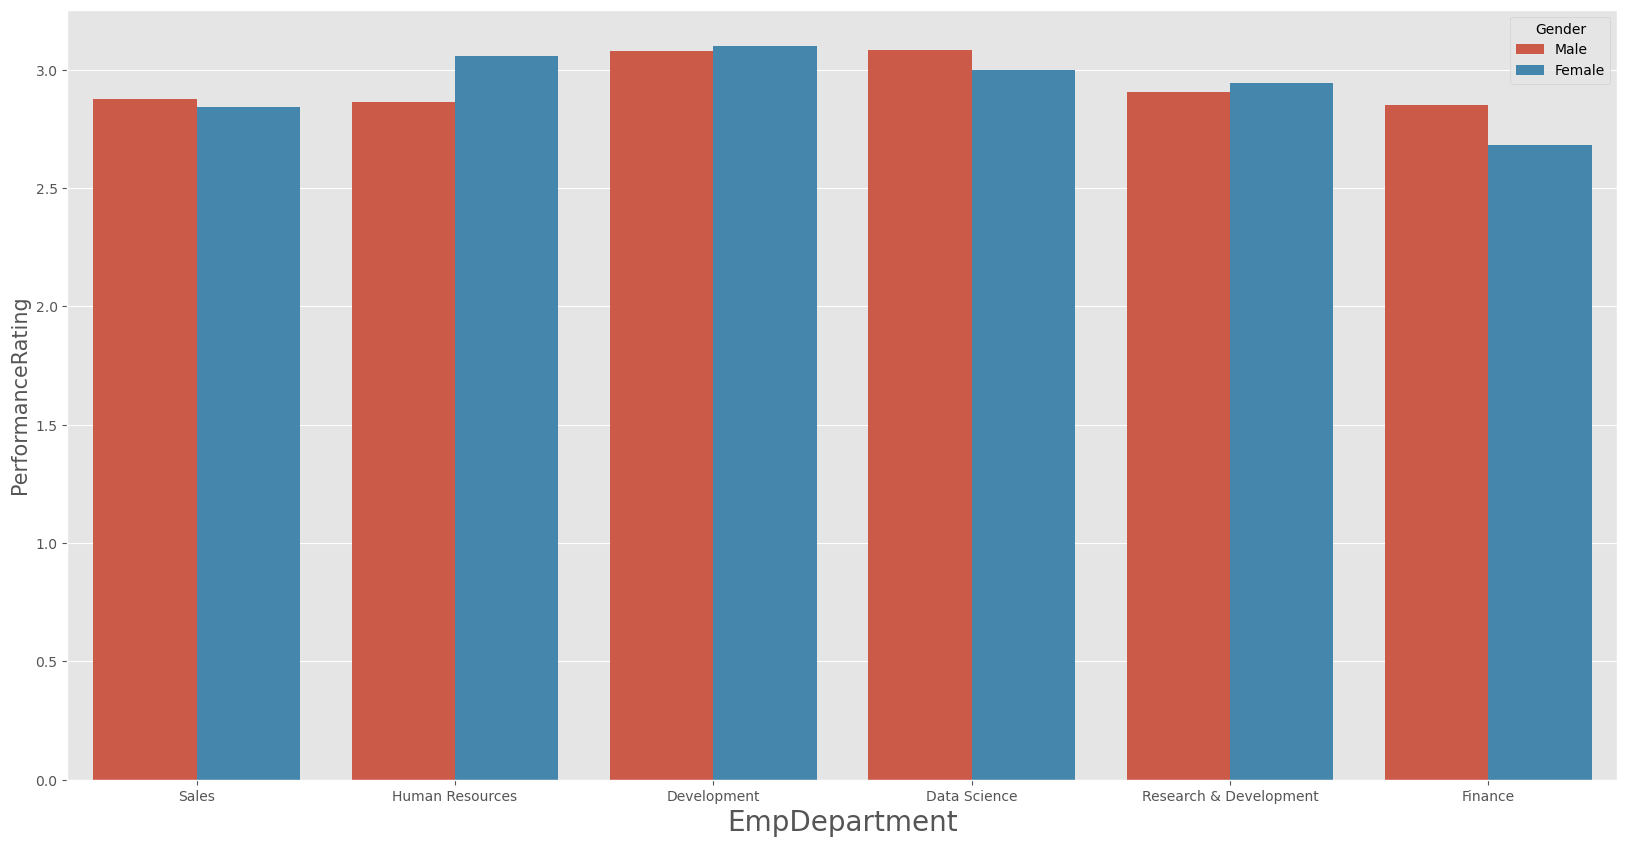

In [27]:
plt.figure(figsize=(20,10), facecolor='white')


sns.barplot(x='EmpDepartment', y='PerformanceRating', hue='Gender', data=df, errorbar= None)

plt.xlabel('EmpDepartment', fontsize=20)
plt.ylabel('PerformanceRating', fontsize=15)
plt.show()

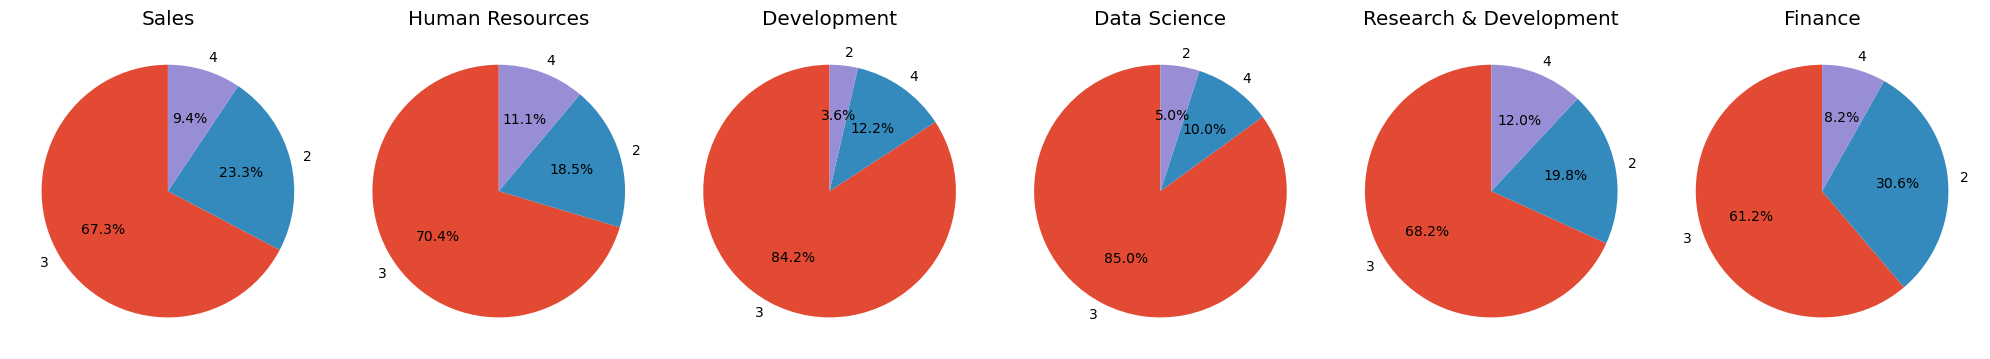

In [35]:
departments = df['EmpDepartment'].unique()

fig, axes = plt.subplots(nrows=1, ncols=len(departments), figsize=(20, 10))

for ax, department in zip(axes, departments):
    filtered_data = df[df['EmpDepartment'] == department]['PerformanceRating']
    value_counts = filtered_data.value_counts()
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(department)

plt.tight_layout()
plt.show()

PerformanceRating - Employee's performance rating, ranked (1. Low, 2. Good, 3. Excellent, 4. Outstanding).

### At a Glance: How Departments Are Performing

**Sales:** In the sales world, most employees are hitting the mark with a performance rating of 3. Men have a slight edge in their ratings over women.

**Human Resources:** Most HR professionals are rocking a performance level of 3. A special shoutout to older employees in HR; they might be a tad behind in their ratings. But the women in HR? They're shining stars, consistently delivering top-notch work.

**Development:** The majority of folks in Development are consistent performers, scoring a level 3. Age doesn't seem to matter here - young or old, they're all at the top of their game. As for gender, it's a tie; both men and women are equally impressive.

**Data Science:** Now, this is an exciting department! They boast the highest average of level 3 performers. It's noteworthy to mention that there's a smaller bunch of level 2 performers here compared to other departments. And guess what? Men in Data Science are outperforming a bit!

**Research & Development:** Age is just a number in R&D! Employees of various ages can be found at each performance level. A thumbs-up to the women in this department; they're bringing their A-game.

**Finance:** The finance realm offers an interesting insight: as employees age, their performance seems to take a dip. Men seem to be at the forefront in terms of performance. A notable mention: more experienced folks might be facing challenges, as their performance tends to decrease a bit.